FIRST
Loop through the first day's training set and each of the 9 test sets. Each test set includes one day of data for days 2 through 10. Therefore all 10 days of data are examined.

Each day includes data for 5 stocks sequentially.
For each day determine the number of records for that day and the number of records for each of the five stocks.
Find the breaks between stocks by looking for a difference large enough to partition the data into 5 sections.

SECOND
For the first stock on the first training day, plot all 144 fields broken out by categories v1-v9 in Kercheval's paper.

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [21]:
testdirectory="/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/"
traindirectory="/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Training/"


In [27]:
f=[testdirectory+"Test_Dst_NoAuction_DecPre_CF_%d.txt" % (i+1) for i in range(9)]
f.insert(0,traindirectory+"Train_Dst_NoAuction_DecPre_CF_1.txt")

In [28]:
f

['/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Training/Train_Dst_NoAuction_DecPre_CF_1.txt',
 '/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_1.txt',
 '/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_2.txt',
 '/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_3.txt',
 '/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_4.txt',
 '/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_5.txt',
 '/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_6.txt',
 '/Users/Alan/CS230/Project/BenchmarkDa

In [41]:
def get_info(d):
    #find the index of the breaks between tickers (b)
    i=np.arange(d.shape[1])
    b=i[d.iloc[0].diff().abs()>0.01]
    b=np.append(b,d.shape[1])
    return b
    

/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Training/Train_Dst_NoAuction_DecPre_CF_1.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 39512 entries, 0 to 39511
dtypes: float64(39512)
memory usage: 44.9 MB
[array([ 3454,  9772, 14694, 25413, 39512])]
/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_1.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 38397 entries, 0 to 38396
dtypes: float64(38397)
memory usage: 43.6 MB
[array([ 3454,  9772, 14694, 25413, 39512]), array([ 5079, 11201, 17166, 23878, 38397])]
/Users/Alan/CS230/Project/BenchmarkDatasets/NoAuction/3.NoAuction_DecPre/NoAuction_DecPre_Testing/Test_Dst_NoAuction_DecPre_CF_2.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 28535 entries, 0 to 28534
dtypes: float64(28535)
memory usage: 32.4 MB
[array([ 

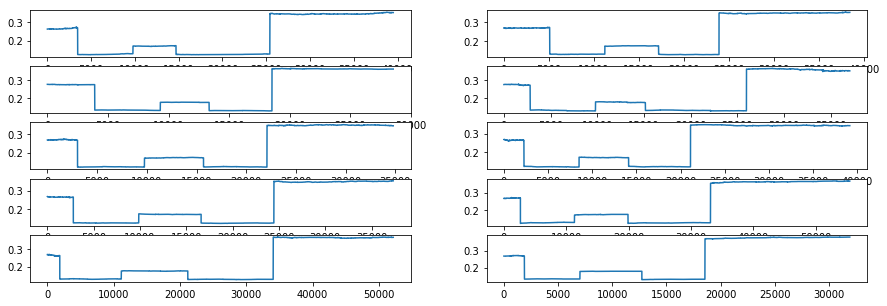

In [42]:
dat=[]
fig=plt.figure(figsize=(15,5))
for i,j in enumerate(f):
    print(j)
    d=pd.read_fwf(j,header=None)
    d.info()
    dat.append(get_info(d))
    print(dat)
    plt.subplot(5,2,i+1)
    d.iloc[0].plot()

In [43]:
 dat

[array([ 3454,  9772, 14694, 25413, 39512]),
 array([ 5079, 11201, 17166, 23878, 38397]),
 array([ 3903,  9314, 13341, 18527, 28535]),
 array([ 2806,  9798, 15140, 25959, 37023]),
 array([ 3030,  9758, 15704, 22082, 34785]),
 array([ 2263,  8506, 14113, 21120, 39152]),
 array([ 2801,  9861, 16601, 24455, 37346]),
 array([ 2647, 11309, 19900, 33129, 55478]),
 array([ 1873, 11144, 21180, 34060, 52172]),
 array([ 1888,  7016, 12738, 18559, 31937])]

In [52]:
mat=np.array(dat)
matdiff=np.diff(np.c_[np.zeros(10),mat])

In [55]:
matdiff

array([[ 3454.,  6318.,  4922., 10719., 14099.],
       [ 5079.,  6122.,  5965.,  6712., 14519.],
       [ 3903.,  5411.,  4027.,  5186., 10008.],
       [ 2806.,  6992.,  5342., 10819., 11064.],
       [ 3030.,  6728.,  5946.,  6378., 12703.],
       [ 2263.,  6243.,  5607.,  7007., 18032.],
       [ 2801.,  7060.,  6740.,  7854., 12891.],
       [ 2647.,  8662.,  8591., 13229., 22349.],
       [ 1873.,  9271., 10036., 12880., 18112.],
       [ 1888.,  5128.,  5722.,  5821., 13378.]])

In [54]:
np.sum(matdiff,axis=0)

array([ 29744.,  67935.,  62898.,  86605., 147155.])

In [56]:
np.sum(matdiff)

394337.0

In [57]:
np.sum(mat,axis=0)

array([ 29744,  97679, 160577, 247182, 394337])

In [58]:
mat

array([[ 3454,  9772, 14694, 25413, 39512],
       [ 5079, 11201, 17166, 23878, 38397],
       [ 3903,  9314, 13341, 18527, 28535],
       [ 2806,  9798, 15140, 25959, 37023],
       [ 3030,  9758, 15704, 22082, 34785],
       [ 2263,  8506, 14113, 21120, 39152],
       [ 2801,  9861, 16601, 24455, 37346],
       [ 2647, 11309, 19900, 33129, 55478],
       [ 1873, 11144, 21180, 34060, 52172],
       [ 1888,  7016, 12738, 18559, 31937]])

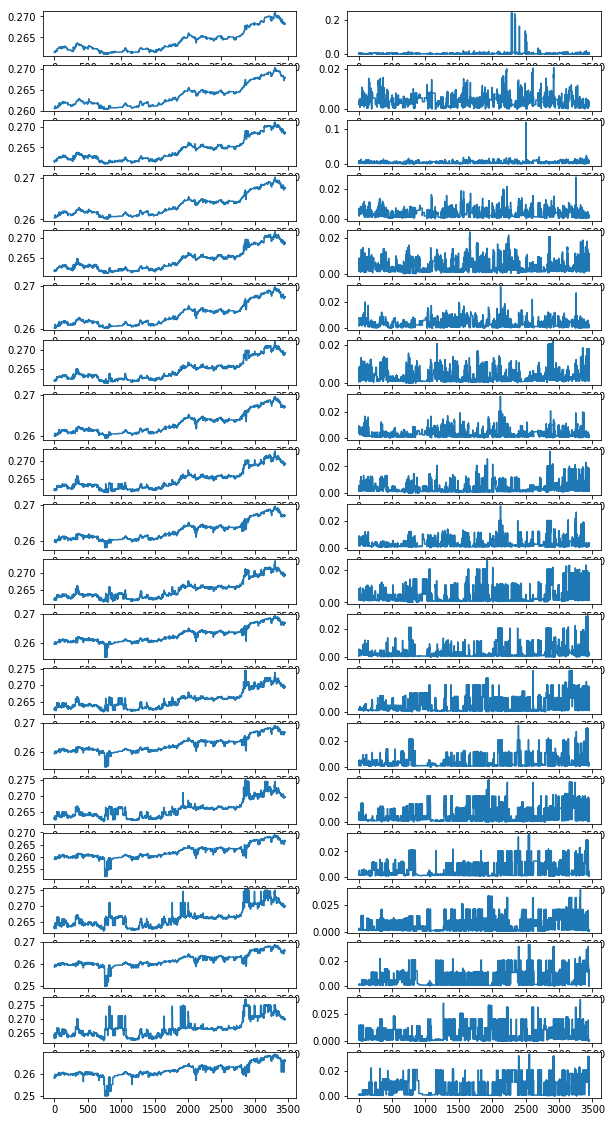

In [87]:
# read first day's data and plot price and volume for first stock
d=pd.read_fwf(f[0],header=None)
#  - price/vol
fig=plt.figure(figsize=(10,20))
for i in range(40):
    plt.subplot(20,2,i+1)
    d.iloc[i,:3454].plot()

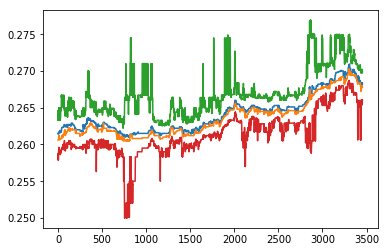

In [89]:
#  Plot inside and outside price bid and offer levels
d.iloc[0,:3454].plot()
d.iloc[2,:3454].plot()
d.iloc[36,:3454].plot()
d.iloc[38,:3454].plot()

### Plot all data for the first stock on the first training day in each of the 9 categories in the Kercheval paper

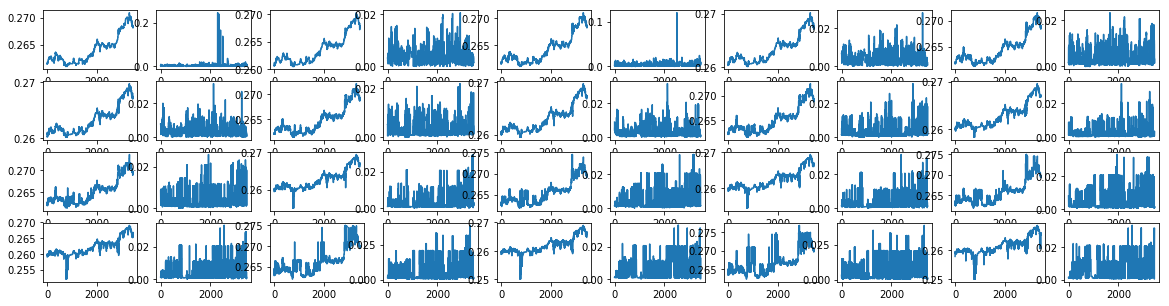

In [95]:
#v1 - pask,vask,pbid,vbid (1-40)
for i in range(40):
    plt.subplot(20,2,i+1)
    d.iloc[i,:3454].plot()

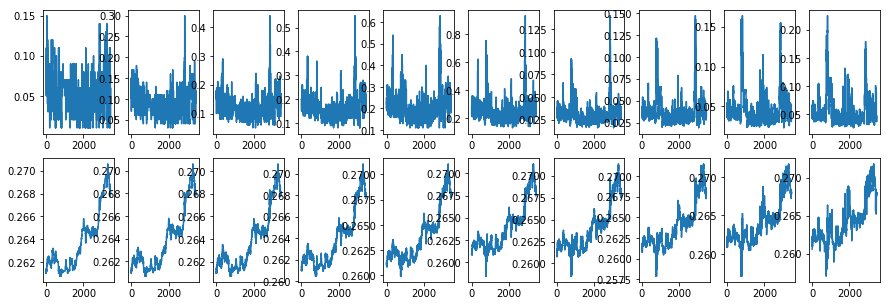

In [99]:
#v2 - spread and mid (41-60)
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    d.iloc[i+40,:3454].plot()

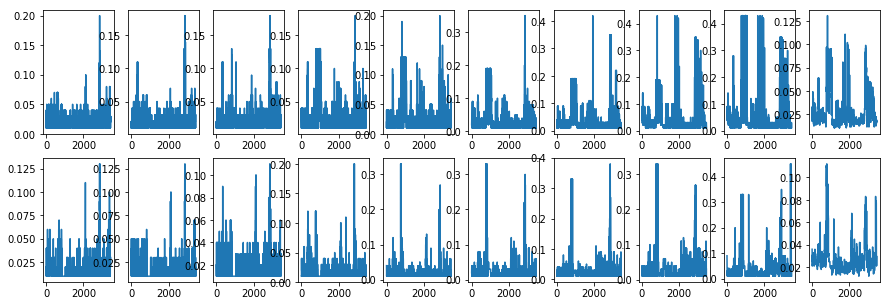

In [100]:
#v3 - pask(10-1),pbid(10-1), pask(i+1)-pask(i),pbid(i+1)-pbid(i) (61-80)
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    d.iloc[i+60,:3454].plot()

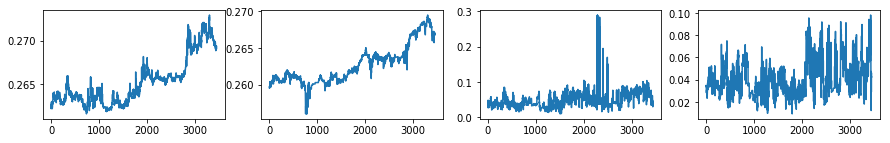

In [102]:
#v4 - mean pask, mean pbid, mean vask, mean vbid(81-84)
plt.figure(figsize=(15,2))
for i in range(4):
    plt.subplot(1,4,i+1)
    d.iloc[i+80,:3454].plot()

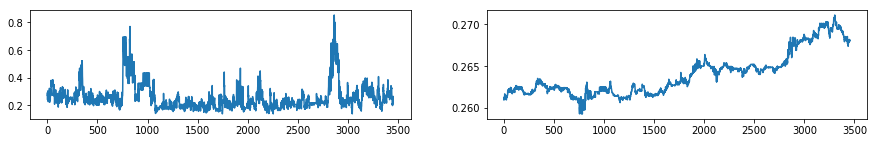

In [103]:
#v5 - sum pask-pbid, sum vask-vbid (85-86)
plt.figure(figsize=(15,2))
for i in range(2):
    plt.subplot(1,2,i+1)
    d.iloc[i+84,:3454].plot()

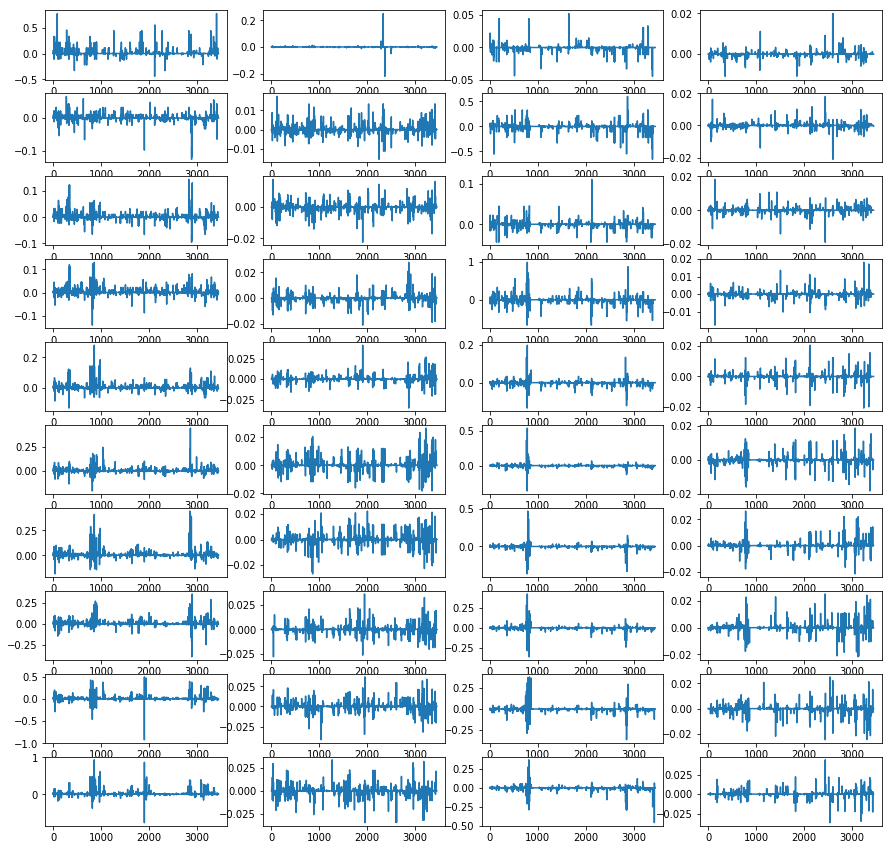

In [106]:
#v6 - pask,vask,pbid,vbid (87-126)
plt.figure(figsize=(15,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    d.iloc[i+86,:3454].plot()

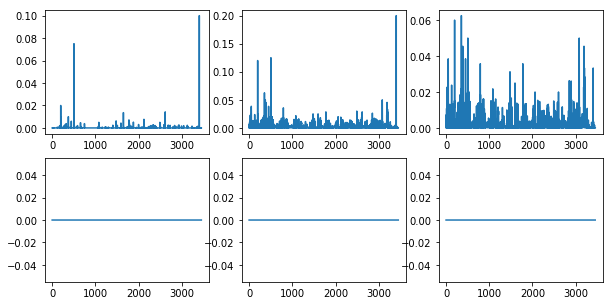

In [108]:
#v7- average intensity for 6 categories (127-132)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    d.iloc[i+126,:3454].plot()

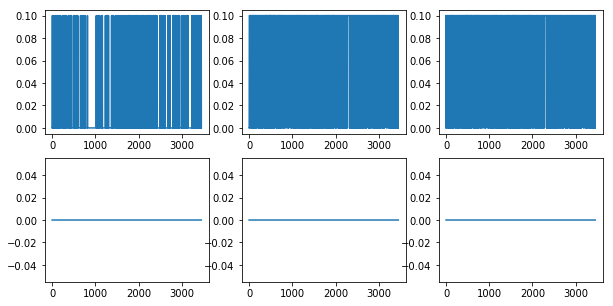

In [109]:
#v8- relative intensity for 6 categories (133-138)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    d.iloc[i+132,:3454].plot()

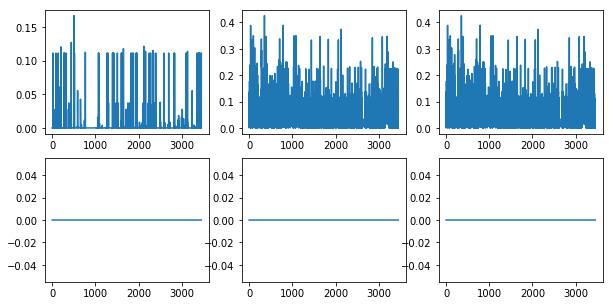

In [110]:
#v8- acceleration for 6 categories (139-144)
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    d.iloc[i+138,:3454].plot()

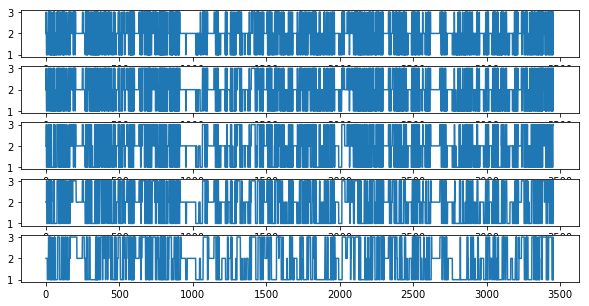

In [111]:
#forecast (1,2,3,5,10) (145-149)
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(5,1,i+1)
    d.iloc[i+144,:3454].plot()